<a href="https://colab.research.google.com/github/nprimavera/Laser-Cutting/blob/main/FINAL_Fractal_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generating a Fractal - general usage

import matplotlib.pyplot as plt
import numpy as np

class Vector:                     # REMINDER: class --> defines the attributes and bahaviors of the vector
    def __init__(self, x, y):     # REMINDER: init function --> special method in a class that is called when an object is created - initializes object's attributes
        self.x = x                # instance variable for x
        self.y = y                # instance variable for y

class AffineTransform:
    def __init__(self, a, b, c, d, e, f):   # initializes object's attributes
        self.a = a    # instance variables
        self.b = b
        self.c = c
        self.d = d
        self.e = e
        self.f = f

def recursivePlot(vector, transforms, num_transforms, current_depth, max_depth, ax):  # recursive plot function w/ specified params
    if current_depth == max_depth:          # base case: current recursion depth equals maximum recursion depth
        ax.plot(vector.x, vector.y, 'ro')   # if true --> recursivePlot will plot the Vector with a call to ax.plot and return
        return

# apply affine transformations to the vector
    for transform in transforms:            # loops through all the transformations in the array
        new_x = transform.a * vector.x + transform.b * vector.y + transform.e
        new_y = transform.c * vector.x + transform.d * vector.y + transform.f
        new_vector = Vector(new_x, new_y)   # calculates a new vector for each transformation
        recursivePlot(new_vector, transforms, num_transforms, current_depth + 1, max_depth, ax)

def drawFractal(startPoint, transforms, max_depth):   # draws the fractal w/ specified params
    fig, ax = plt.subplots()                          # ax plot allows the function to plot on the same set of axes throughout its recursive calls
    num_transforms = len(transforms)                  # the number of transforms is equal to the amount/length of transforms - defined in usage
    recursivePlot(startPoint, transforms, num_transforms, 0, max_depth, ax)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Sierpinski triangle')
    ax.grid(True)
    plt.savefig('fractal.svg', format='svg')          # saves the fractal as an svg file


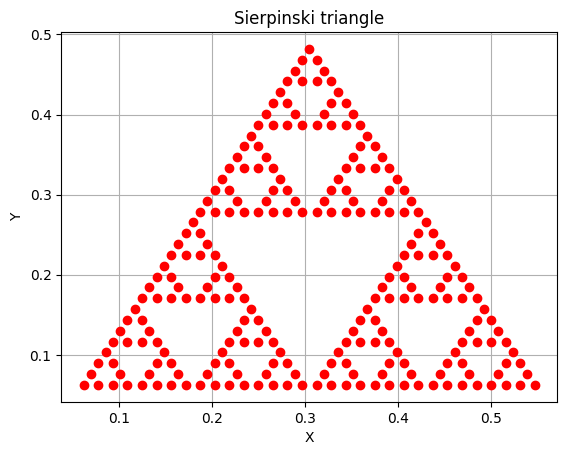

In [4]:
# Example usage - using the Sierpinski triangle for this example

## Starting point of the fractal - from user input
#def user_input():
    #while True:
        #try:
            #x = int(input("Enter the x-coordinate of the starting point (in inches, maximum 12): ")) * 90   # 90 pixels per inch
            #y = int(input("Enter the y-coordinate of the starting point (in inches, maximum 18): ")) * 90
            #if 0 <= x <= 1080 and 0 <= y <= 1620:  # Check if coordinates are within constraints
                #return Vector(x, y)
            #else:
                #print("Error: Coordinates must be within 12 inches for x and 18 inches for y.")
        #except ValueError:
            #print("Error: Invalid input. Please enter valid numerical values for coordinates.")

if __name__ == "__main__":
    # Calculate the middle point of the box
    middle_x = 2    # set as this in main code: box_width / 2
    middle_y = 2    # # set as this in main code: box_height / 2

    # Calculate the starting point for the fractal
    startPoint = Vector(middle_x, middle_y)

    # Define transformations for Sierpinski triangle - these transformations make sure the fractal is symmetrical around the midpoint
    transforms = [
    AffineTransform(0.5, 0, 0, 0.5, 0, 0),         # Scale down by 1/2
    AffineTransform(0.5, 0, 0, 0.5, 0.25, 0),      # Scale down by 1/2 and move right by 0.25
    AffineTransform(0.5, 0, 0, 0.5, 0.125, 0.2165) # Scale down by 1/2, move right by 0.125, and up by 0.2165
    ]

    # Calculate maximum recursion depth
    max_depth = 5

    # Execute the draw fractal function
    drawFractal(startPoint, transforms, max_depth)

In [ ]:
# Box width is defined in the combined file